## Desafio

> Atenção: este notebook foi desenhado para funcionar no **Google Colab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-colab```.

Utilize a imagem da embalagem, conforme a baixo, como alvo para obter suas características.

Aplique o algoritmo de extração de características ORB.
Para a correspondência de informações entre a embalagem e o logo, utilize o método de FLANN.

Após testes, estabeleça um limiar de pontos de correspondência e, por meio deste valor, informe se a embalagem é detectada ou não, comparando com outra embalagem.

Logo Hellmanns

<img src="imagens/logo.jpeg">

Captura de vídeo (apenas um frame)

<img src="imagens/maionese.jpeg">

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!rm -rf fiap-ml-visao-computacional/

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório

In [ ]:
%cd fiap-ml-visao-computacional/extra/desafio-2/

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

Imagem de Treinamento, logotipo do pote.

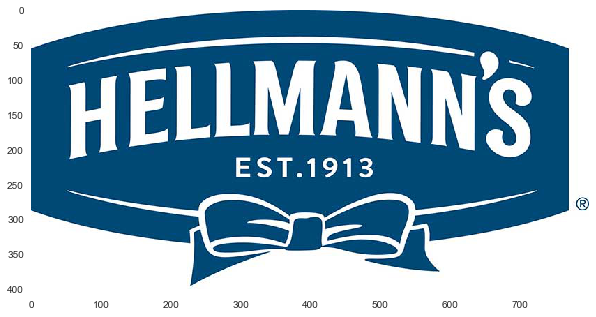

In [26]:
image_training = cv2.imread("imagens/logo.jpeg")
image_training = cv2.cvtColor(image_training, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(image_training)

image_training_gray = cv2.cvtColor(image_training, cv2.COLOR_BGR2GRAY)

Imagem de busca, neste caso uma embalagem.

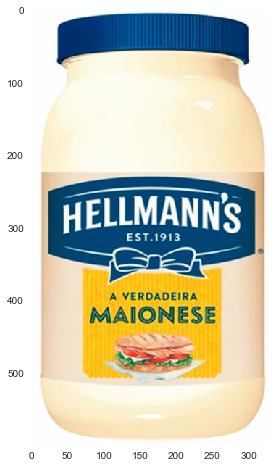

In [27]:
image_query = cv2.imread("imagens/maionese.jpeg")
image_query = cv2.cvtColor(image_query, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(image_query)

image_query_gray = cv2.cvtColor(image_query, cv2.COLOR_BGR2GRAY)

Imagem de teste negativo.

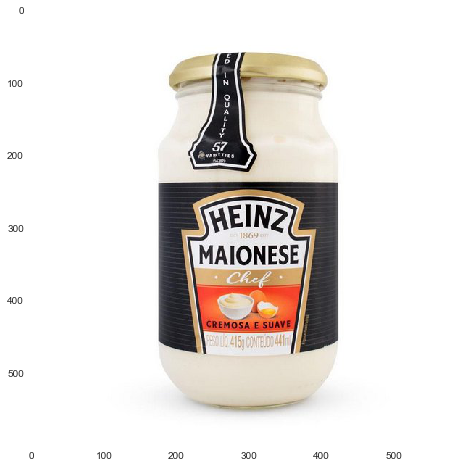

In [28]:
image_query_2 = cv2.imread("imagens/henz.jpeg")
image_query_2 = cv2.cvtColor(image_query_2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(image_query_2)

image_query_gray_2 = cv2.cvtColor(image_query_2, cv2.COLOR_BGR2GRAY)

Construindo o detector ORB

In [29]:
# Para identificar todos os pontos, exclua o número do construtor abaixo
orb_detector = cv2.ORB_create(1000)
kps_training = orb_detector.detect(image_training_gray, None)
kps_training, desc_training = orb_detector.compute(image_training_gray, kps_training)

print("Pontos detectados " + str(len(kps_training)))

Pontos detectados 1000


Visualização das características encontradas

Text(0.5, 1.0, 'Logo Feature Vector')

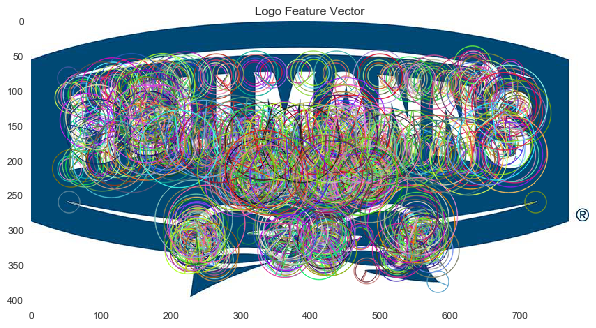

In [30]:
image_detected = image_training.copy()
image_detected = cv2.drawKeypoints(image_detected, kps_training, image_detected, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,8))
plt.imshow(image_detected)
plt.title("Logo Feature Vector")

Aplicando o detector para uma imagem de busca

In [31]:
kps = orb_detector.detect(image_query_gray, None)
kps_query, desc_query = orb_detector.compute(image_query_gray, kps)

kps_2 = orb_detector.detect(image_query_gray_2, None)
kps_query_2, desc_query_2 = orb_detector.compute(image_query_gray_2, kps_2)

Visualização de correspondência por FLANN

Text(0.5, 1.0, 'Matches 158')

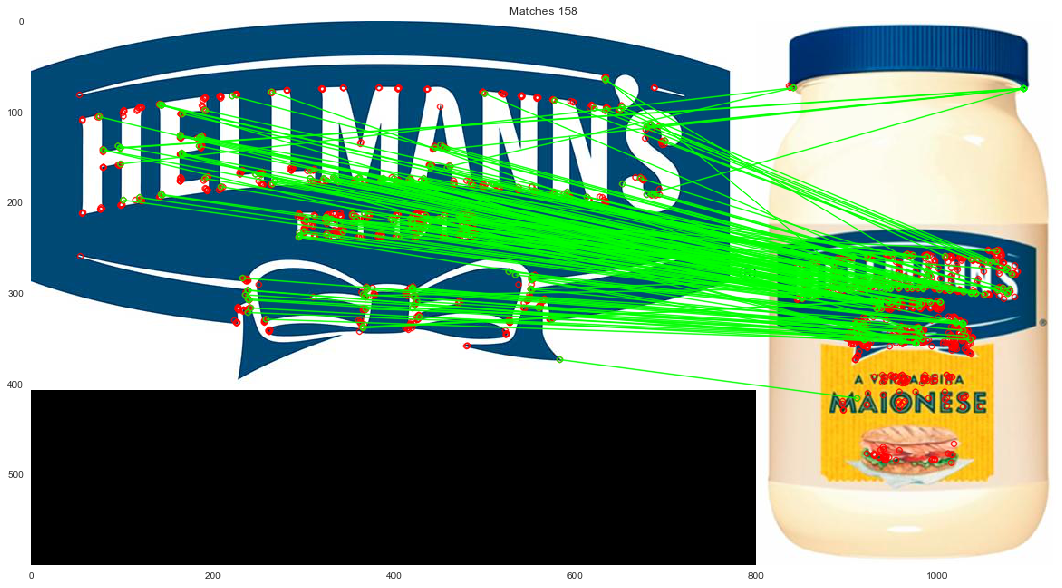

In [35]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH, table_number = 6, key_size = 12, multi_probe_level = 1) 
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc_training, desc_query, k=2)

matchesMask = [[0,0] for i in range(len(matches))]

points = 0

for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        matchesMask[i]=[1,0]
        points = points + 1

draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = 0)
image_detected = cv2.drawMatchesKnn(image_training, kps_training, image_query, kps_query, matches, None, **draw_params)

plt.figure(figsize=(20,10))
plt.imshow(image_detected)

plt.title("Matches " + str(points))

Teste com imagem negativa. Note a quantidade de pontos identificados.

Text(0.5, 1.0, 'Matches 42')

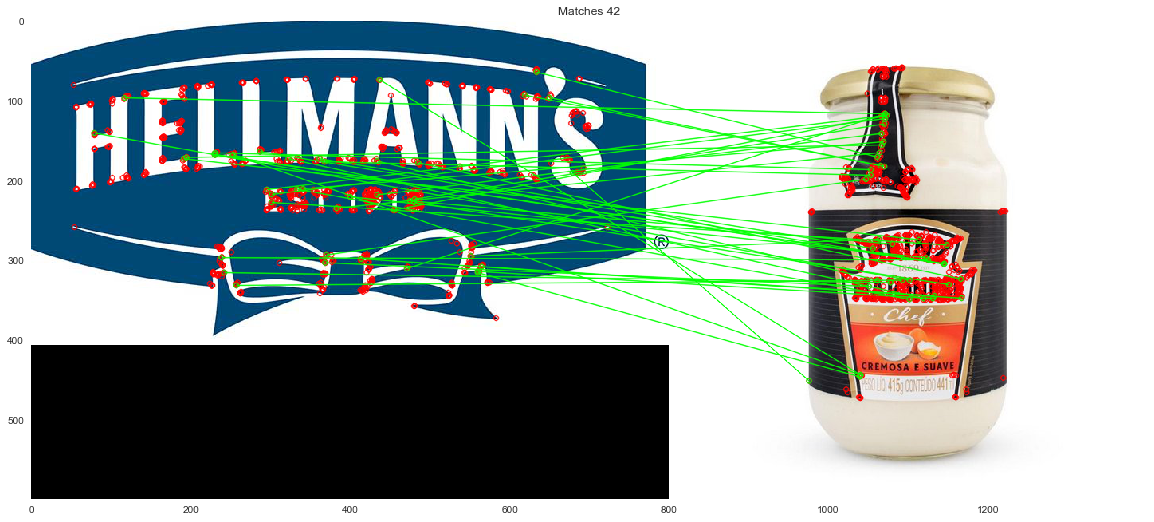

In [37]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH, table_number = 6, key_size = 12, multi_probe_level = 1) 
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc_training, desc_query_2, k=2)

matchesMask = [[0,0] for i in range(len(matches))]

points = 0

for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        matchesMask[i]=[1,0]
        points = points + 1

draw_params = dict(matchColor = (0,255,0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags = 0)
image_detected = cv2.drawMatchesKnn(image_training, kps_training, image_query_2, kps_query_2, matches, None, **draw_params)

plt.figure(figsize=(20,10))
plt.imshow(image_detected)
plt.title("Matches " + str(points))